In [107]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [108]:
# REQUIRED LIBRARIES 

import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from seaborn import load_dataset

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [109]:

dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [111]:
dataset.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [112]:
# Since "0" values are not NaN we can not identify missing values. 

In [113]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [114]:
new_data = dataset.loc[:,'Glucose':'BMI'] 
new_data.replace(0,np.nan,inplace=True) 
dataset.loc[:,'Glucose':'BMI'] = new_data
# Since Glucose, BloodPressure, SkinThickness, Insulin and BMI contain "0" values that is not possible we converted "0" values to "NaN"


In [115]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## MISSING VALUES

In [116]:
dataset.isnull().sum() #checking # of missing values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

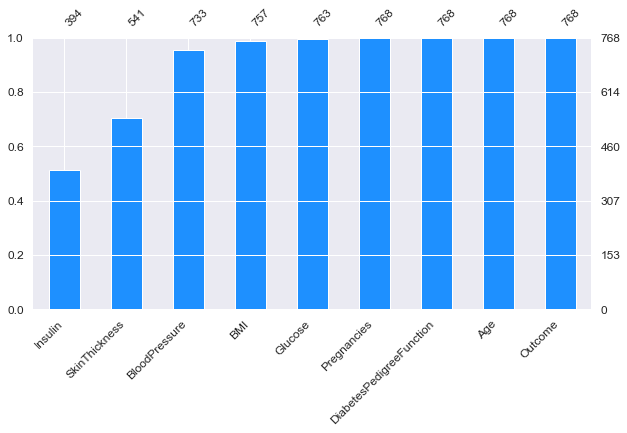

In [117]:
msno.bar(dataset, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

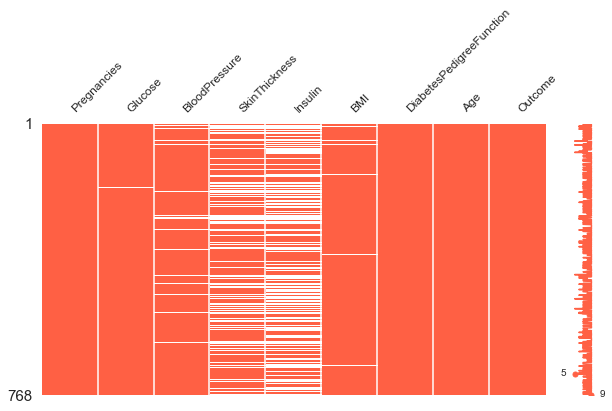

In [118]:
msno.matrix(dataset, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

<AxesSubplot:>

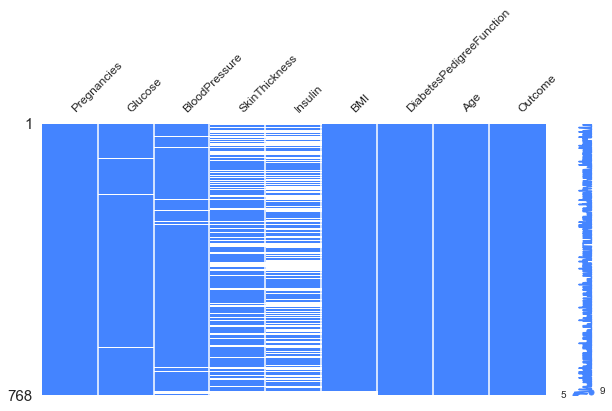

In [119]:
msno.matrix(dataset.sort_values(by="BMI"),figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

<AxesSubplot:>

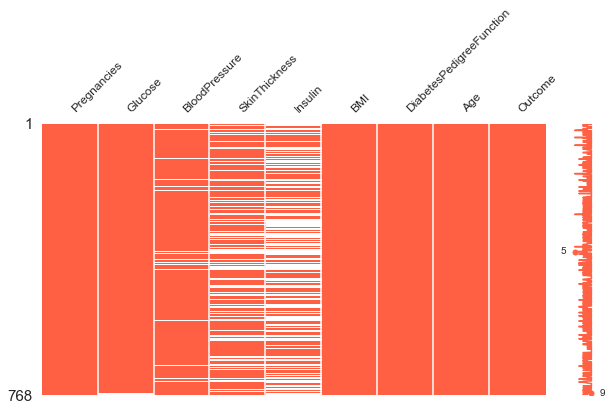

In [120]:
msno.matrix(dataset.sort_values(by="Glucose"),figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))

<AxesSubplot:>

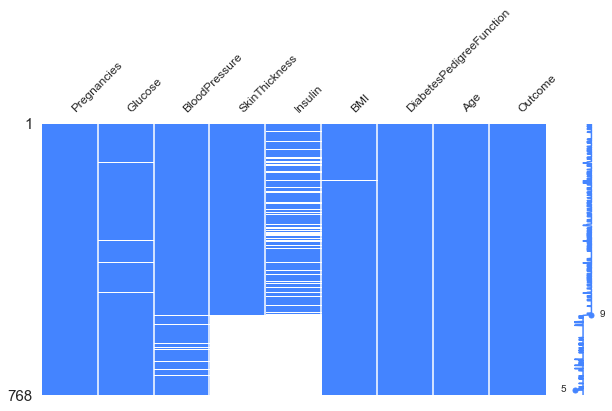

In [121]:
msno.matrix(dataset.sort_values(by="SkinThickness"),figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

In [122]:
# Observing above matrices we can say that SkinThickness and Insulin have high correlation and they are missing not randomly.
#Also, we decide that Glucose and BMI values are randomly missing.

<AxesSubplot:>

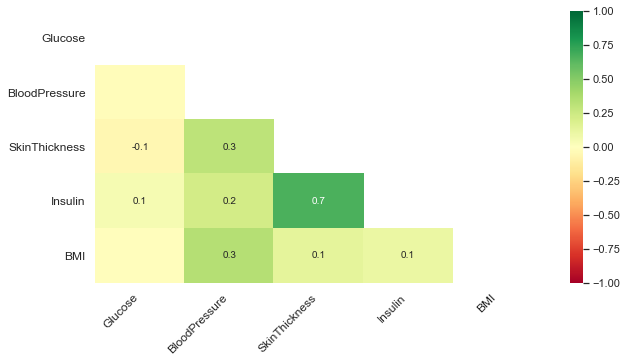

In [123]:
msno.heatmap(dataset,figsize=(10,5), fontsize=12,cmap="RdYlGn")

In [124]:
#As we mentioned before there is high correlation between SkinThickness and Insulin

In [125]:
dataset.dropna(subset=['Glucose','BMI'],inplace=True) # Since there are randomly missing values for Glucose and BMI, we dropped them as we can not fill them.

In [126]:
knn_dataset = dataset.copy()

In [127]:
knn_imputer = KNNImputer(n_neighbors=5)
knn_dataset.iloc[:,:] = knn_imputer.fit_transform(knn_dataset)
# We fill the missing values with KNN.

In [128]:
knn_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.413830,29.102128,154.656649,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.223965,9.473877,98.872359,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,90.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,135.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.650000,191.850000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## OUTLIER REMOVAL

In [129]:
clean_dataset=knn_dataset.copy()

<AxesSubplot:xlabel='Pregnancies'>

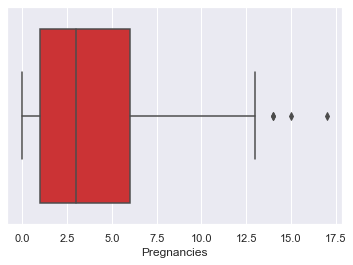

In [130]:
sns.boxplot(data=knn_dataset,x='Pregnancies', palette="Set1")

In [131]:
clean_dataset = clean_dataset[clean_dataset['Pregnancies']<=13]

<AxesSubplot:xlabel='Pregnancies'>

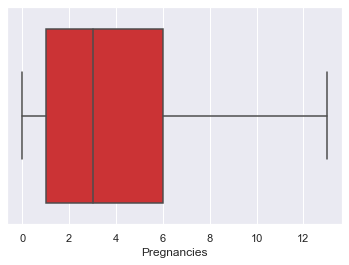

In [132]:
sns.boxplot(data=clean_dataset,x='Pregnancies', palette="Set1")

<AxesSubplot:xlabel='BloodPressure'>

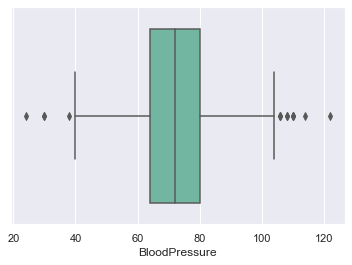

In [133]:
sns.boxplot(data=knn_dataset,x='BloodPressure', palette="Set2")

In [134]:
clean_dataset = clean_dataset[clean_dataset['BloodPressure']>=40]

<AxesSubplot:xlabel='BloodPressure'>

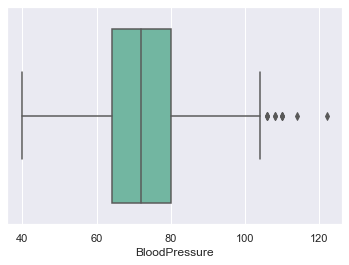

In [135]:
sns.boxplot(data=clean_dataset,x='BloodPressure', palette="Set2")

<AxesSubplot:xlabel='Insulin'>

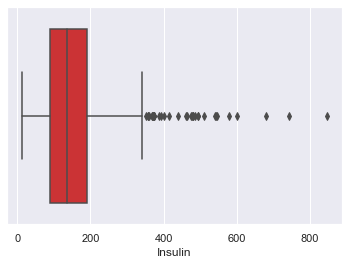

In [136]:
sns.boxplot(data=knn_dataset,x='Insulin', palette="Set1")

In [137]:
clean_dataset = clean_dataset[clean_dataset['Insulin']<=400]

<AxesSubplot:xlabel='Insulin'>

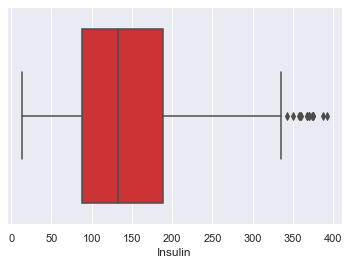

In [138]:
sns.boxplot(data=clean_dataset,x='Insulin', palette="Set1")

<AxesSubplot:xlabel='SkinThickness'>

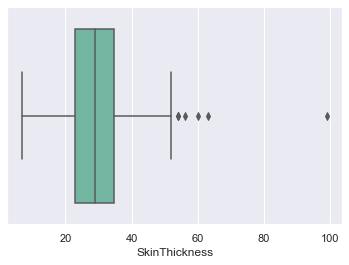

In [139]:
sns.boxplot(data=knn_dataset,x='SkinThickness', palette="Set2")

In [140]:
clean_dataset = clean_dataset[clean_dataset['SkinThickness']<=60]

<AxesSubplot:xlabel='SkinThickness'>

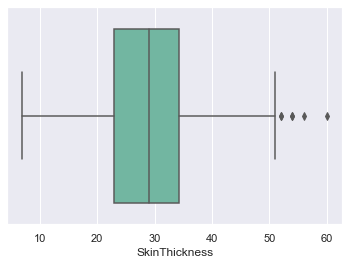

In [141]:
sns.boxplot(data=clean_dataset,x='SkinThickness', palette="Set2")

<AxesSubplot:xlabel='BMI'>

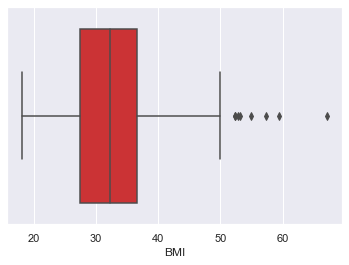

In [142]:
sns.boxplot(data=knn_dataset,x='BMI', palette="Set1")

In [143]:
clean_dataset = clean_dataset[clean_dataset['BMI']<=55]

<AxesSubplot:xlabel='BMI'>

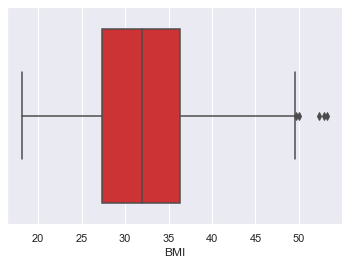

In [144]:
sns.boxplot(data=clean_dataset,x='BMI', palette="Set1")

<AxesSubplot:xlabel='Age'>

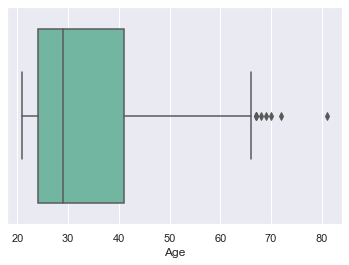

In [145]:
sns.boxplot(data=knn_dataset,x='Age', palette="Set2")

In [146]:
clean_dataset = clean_dataset[clean_dataset['Age']<=65]

<AxesSubplot:xlabel='Age'>

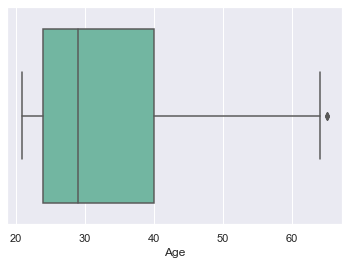

In [147]:
sns.boxplot(data=clean_dataset,x='Age', palette="Set2")

In [148]:
print("Total number of",knn_dataset.shape[0]-clean_dataset.shape[0],"outliers are removed")

Total number of 45 outliers are removed


In [149]:
clean_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,3.811881,120.265912,72.413579,28.746535,143.009052,32.240311,0.466576,32.637907,0.338048
std,3.301639,29.581931,11.828186,8.993647,73.847543,6.624134,0.313551,10.745795,0.473380
min,0.000000,44.000000,40.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.900000,88.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,29.000000,132.600000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,138.500000,80.000000,34.300000,185.000000,36.400000,0.626500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,392.000000,53.200000,2.288000,65.000000,1.000000


<AxesSubplot:>

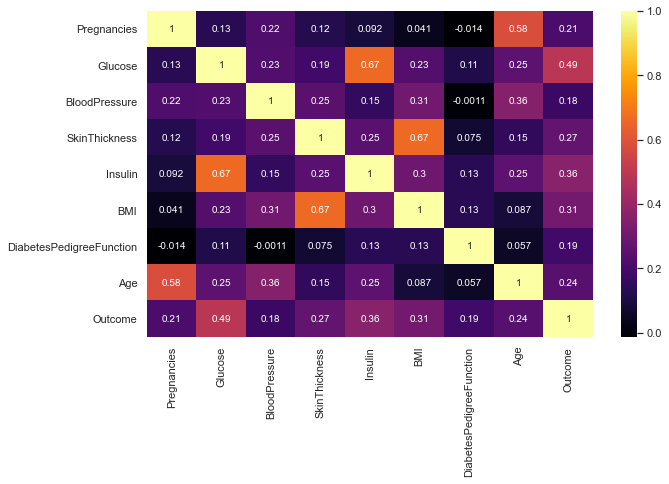

In [150]:
plt.figure(figsize=(10,6))
sns.heatmap(clean_dataset.corr(),annot=True,cmap='inferno')

In [151]:
# Above heat map shows correlation for the clean_dataset.

<AxesSubplot:>

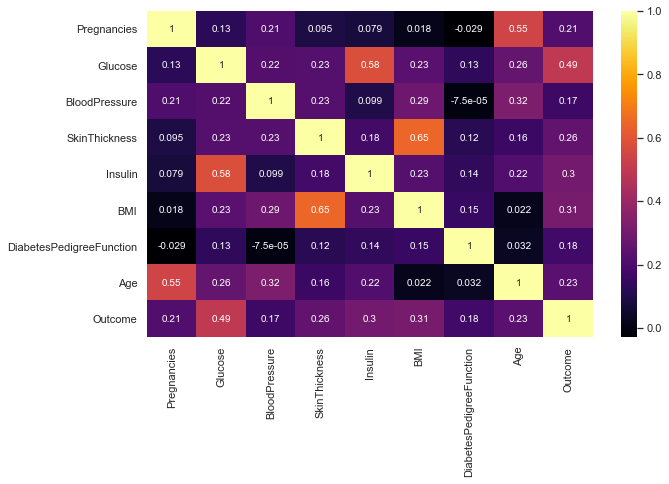

In [152]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True,cmap='inferno')

In [153]:
# Above heat map shows correlation for the dataset.

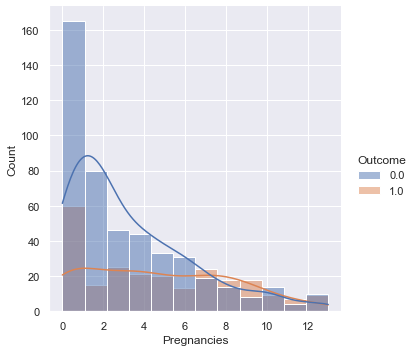

In [154]:
sns.displot(data=clean_dataset,x='Pregnancies',hue='Outcome',kde=True)

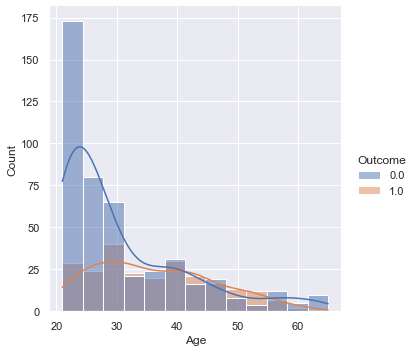

In [155]:
sns.displot(data=clean_dataset,x='Age',hue='Outcome',kde=True)

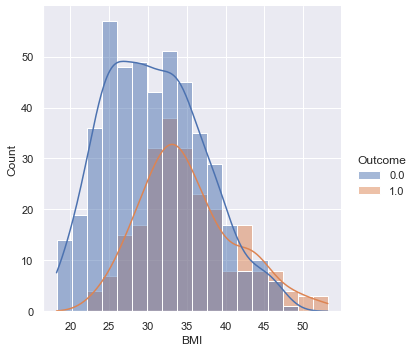

In [156]:
sns.displot(data=clean_dataset,x='BMI',hue='Outcome',kde=True)

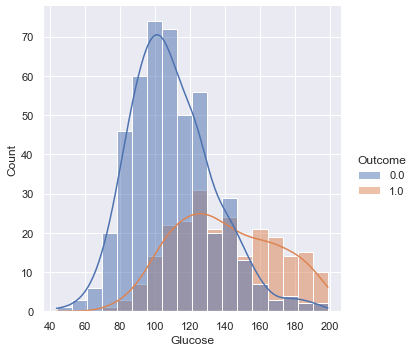

In [157]:
sns.displot(data=clean_dataset,x='Glucose',hue='Outcome',kde=True)

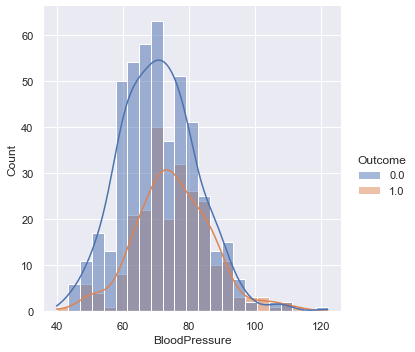

In [158]:
sns.displot(data=clean_dataset,x='BloodPressure',hue='Outcome',kde=True)

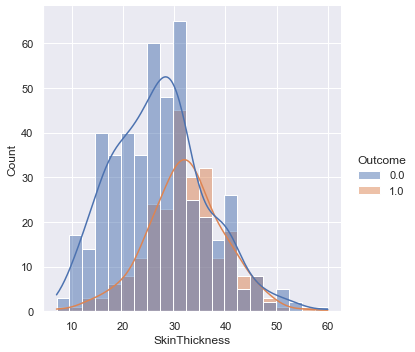

In [159]:
sns.displot(data=clean_dataset,x='SkinThickness',hue='Outcome',kde=True)

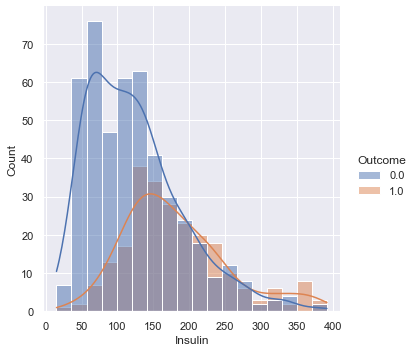

In [160]:
sns.displot(data=clean_dataset,x='Insulin',hue='Outcome',kde=True)

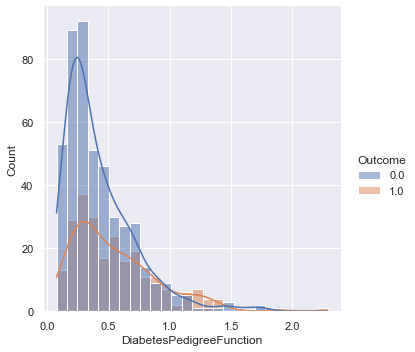

In [161]:
sns.displot(data=clean_dataset,x='DiabetesPedigreeFunction',hue='Outcome',kde=True)

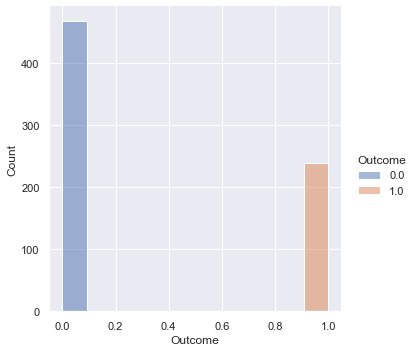

In [162]:
sns.displot(data=clean_dataset,x='Outcome',hue='Outcome',kde=True)

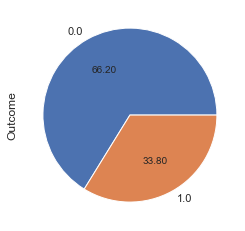

In [163]:
clean_dataset['Outcome'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [164]:
clean_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

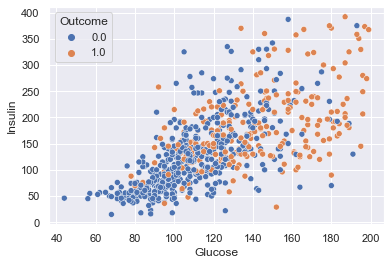

In [165]:
sns.scatterplot(data=clean_dataset,x='Glucose',y='Insulin',hue='Outcome')

<AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>

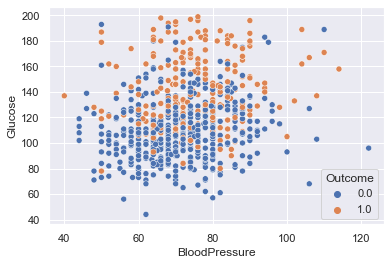

In [166]:
sns.scatterplot(data=clean_dataset,x='BloodPressure',y='Glucose',hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

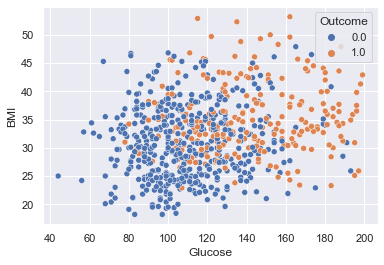

In [167]:
sns.scatterplot(data=clean_dataset,x='Glucose',y='BMI',hue='Outcome')

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

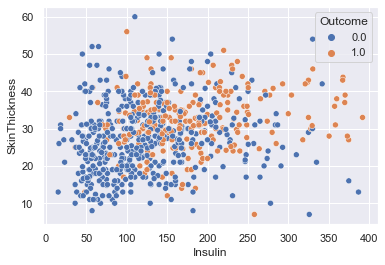

In [168]:
sns.scatterplot(data=clean_dataset,x='Insulin',y='SkinThickness',hue='Outcome')

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

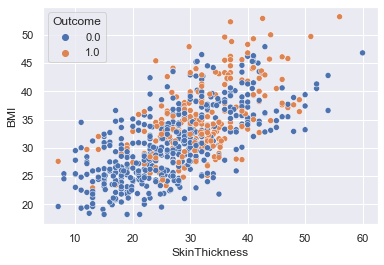

In [169]:
sns.scatterplot(data=clean_dataset,x='SkinThickness',y='BMI',hue='Outcome')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>

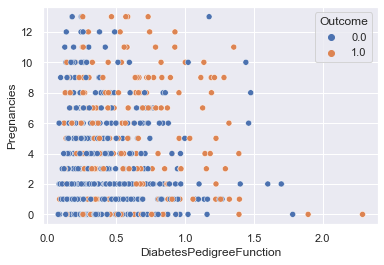

In [170]:
sns.scatterplot(data=clean_dataset,x='DiabetesPedigreeFunction',y='Pregnancies',hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

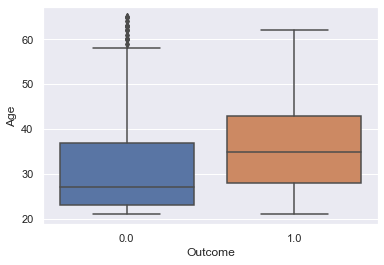

In [171]:
sns.boxplot(clean_dataset['Outcome'], clean_dataset["Age"])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

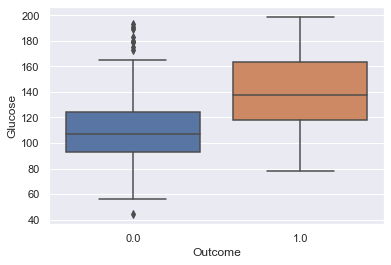

In [172]:
sns.boxplot(clean_dataset['Outcome'], clean_dataset["Glucose"])

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

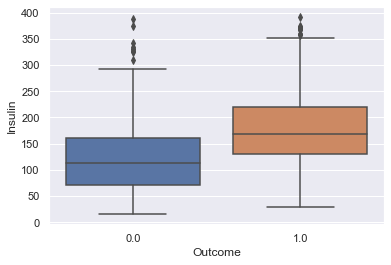

In [173]:
sns.boxplot(clean_dataset['Outcome'], clean_dataset["Insulin"])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

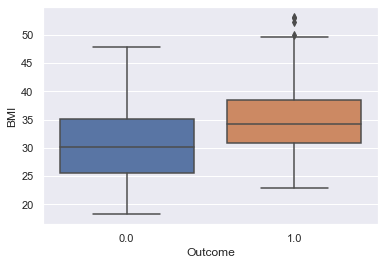

In [174]:
sns.boxplot(clean_dataset['Outcome'], clean_dataset["BMI"])

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

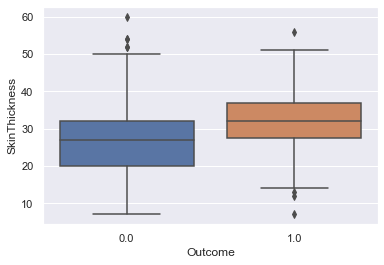

In [175]:
sns.boxplot(clean_dataset['Outcome'], clean_dataset["SkinThickness"])

## Classification Algorithms

## Logistic Regression

In [176]:
X = clean_dataset.drop('Outcome',axis=1) # prediction will be done by using those values
y = clean_dataset['Outcome']  

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42) 
# we divide dataset into two subset that are test and train.

In [178]:
smote = SMOTE(random_state=42) 
x_res,y_res=smote.fit_resample(X_train,y_train) 
# Smote generates new samples base on our dataset.

In [179]:
predictor = Pipeline([("scaler", StandardScaler()),
        ("logistic_regression", LogisticRegression(solver='liblinear'))])

params = {'logistic_regression__penalty' : ['l1','l2'],
    'logistic_regression__C': np.linspace(0.001,100)
}
grid = GridSearchCV(predictor, params, cv=5,verbose=True,n_jobs=-1,scoring='recall')
# We choose the best parameters utilizing pipeline and gridsearch.

In [180]:
grid.fit(x_res,y_res) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic_regression__C': array([1.00000000e-03, 2.04179592e+00, 4.08259184e+00, 6.12338776e+00,
       8.16418367e+00, 1.02049796e+01, 1.22457755e+01, 1.42865714e+01,
       1.63273673e+01, 1.83681633e+01, 2.0408959...
       5.71432857e+01, 5.91840816e+01, 6.12248776e+01, 6.32656735e+01,
       6.53064694e+01, 6.73472653e+01, 6.93880612e+01, 7.14288571e+01,
       7.34696531e+01, 7.55104490e+01, 7.75512449e+01, 7.95920408e+01,
       8.16328367e+01, 8.36736327e+01, 8.57144286e+01, 8.77552245e+01,
       8.97960204e+01, 9.18368163e+01, 9.38776122e+01, 9.59184082e+01,
       9.79592041e+01, 1.00000000e+02]),
                         'logistic_regression__penalty': ['l1', 'l2']},
             scoring='recall'

In [181]:
grid.best_params_ 

{'logistic_regression__C': 2.0417959183673466,
 'logistic_regression__penalty': 'l1'}

In [182]:
y_prediction = grid.predict(X_test) 

Text(0.5, 66.5, 'Ground Truth')

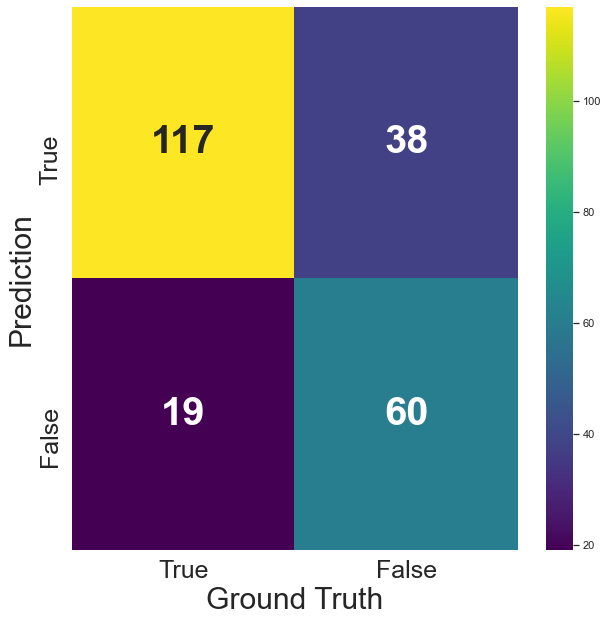

In [183]:
#plot the confusion matrix
_, cm = plt.subplots(figsize=(10,10))
cm = sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
cm.set_xticklabels(labels, fontsize=25);
cm.set_yticklabels(labels, fontsize=25);
cm.set_ylabel('Prediction', fontsize=30);
cm.set_xlabel('Ground Truth', fontsize=30)

In [184]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       155
         1.0       0.61      0.76      0.68        79

    accuracy                           0.76       234
   macro avg       0.74      0.76      0.74       234
weighted avg       0.78      0.76      0.76       234



In [185]:
y_prediction

array([0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0.

In [186]:
my_list0 = {"Actual value": y_test, "Predicted value": y_prediction}
pd.DataFrame.from_dict(my_list0).sample(10)

,Actual value,Predicted value
603,1.0,1.0
303,1.0,1.0
629,0.0,0.0
542,1.0,1.0
677,0.0,0.0
77,0.0,0.0
99,1.0,1.0
373,0.0,0.0
375,1.0,1.0
374,0.0,1.0


## KNN 

In [187]:
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
# First, we should scale our data for knn

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33,stratify=y,random_state=42)
# we divide dataset into two subset that are test and train again.

In [189]:
smote = SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(X_train,y_train)

In [190]:
range_k = 50
recall_scores = list()
f1_scores = list()
for num in range(1, range_k):
    
    knn = KNeighborsClassifier(n_neighbors=num, weights='distance')
    knn = knn.fit(x_res, y_res)
    
    y_prediction = knn.predict(X_test)
    r = recall_score(y_prediction, y_test)
    recall_scores.append((num, round(recall_score(y_test, y_prediction), 4)))
    f1_scores.append((num, round(f1_score(y_test, y_prediction), 4)))
    
r_results = pd.DataFrame(recall_scores, columns=['K', 'Recall'])
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1'])

<Figure size 1800x1200 with 0 Axes>

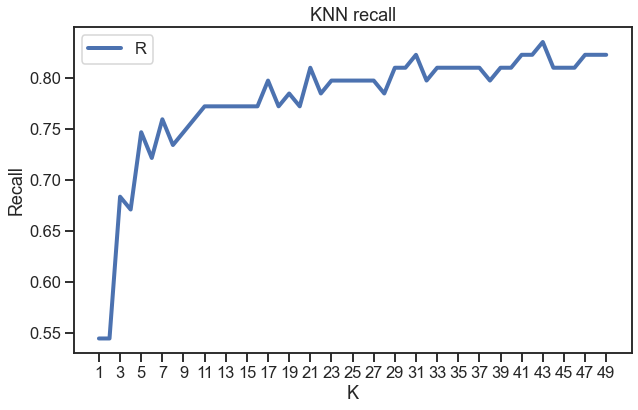

In [191]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
graph = r_results.set_index('K').plot(figsize=(10, 6), linewidth=4)
graph.set(xlabel='K', ylabel='Recall')
graph.set_xticks(range(1, range_k, 2));
plt.title('KNN recall')
plt.legend(labels='R')

<Figure size 1800x1200 with 0 Axes>

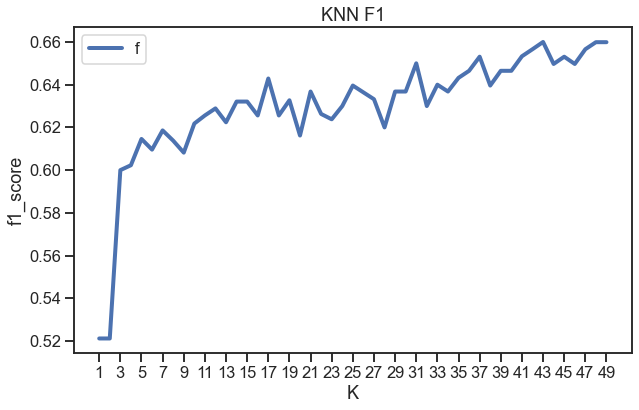

In [192]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
graph = f1_results.set_index('K').plot(figsize=(10, 6), linewidth=4)
graph.set(xlabel='K', ylabel='f1_score')
graph.set_xticks(range(1, range_k, 2));
plt.title('KNN F1')
plt.legend(labels='f1_score')

Text(0.5, 58.5, 'Ground Truth')

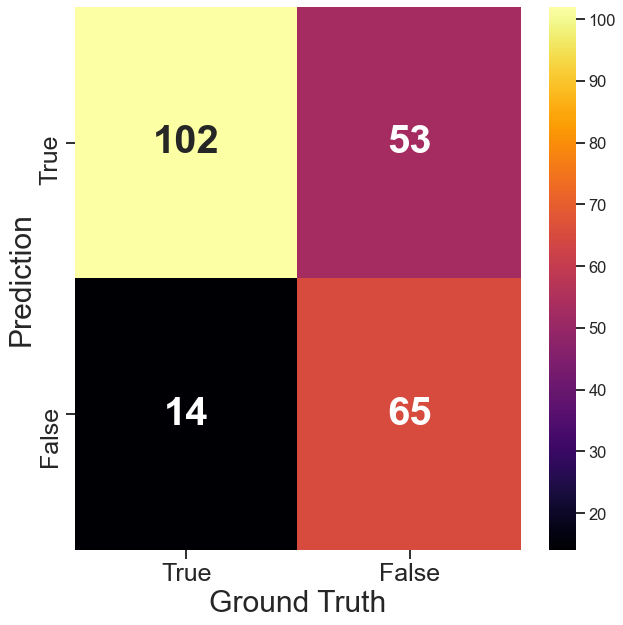

In [193]:
_, cm = plt.subplots(figsize=(10,10))
cm = sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='inferno', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True','False']
cm.set_xticklabels(labels, fontsize=25);
cm.set_yticklabels(labels, fontsize=25);
cm.set_ylabel('Prediction', fontsize=30);
cm.set_xlabel('Ground Truth', fontsize=30)

In [194]:
knn = KNeighborsClassifier(n_neighbors=43, weights='distance')
knn = knn.fit(x_res, y_res)
y_prediction = knn.predict(X_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75       155
         1.0       0.55      0.84      0.66        79

    accuracy                           0.71       234
   macro avg       0.72      0.74      0.70       234
weighted avg       0.77      0.71      0.72       234



In [195]:
y_prediction

array([1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0.

In [196]:
my_list = {"Actual value": y_test, "Predicted value": y_prediction}
pd.DataFrame.from_dict(my_list).sample(10)

,Actual value,Predicted value
277,0.0,0.0
109,1.0,0.0
507,0.0,0.0
245,1.0,1.0
132,1.0,1.0
10,0.0,0.0
293,1.0,1.0
511,0.0,0.0
447,0.0,0.0
712,1.0,1.0


In [197]:
error_rates = []
for value_k in range(20, 50):
    knn = KNeighborsClassifier(n_neighbors=value_k)
    knn.fit(x_res, y_res)
    
    y_prediction_test = knn.predict(X_test)
    
    errors = 1 - accuracy_score(y_test, y_prediction_test)
    error_rates.append(errors)

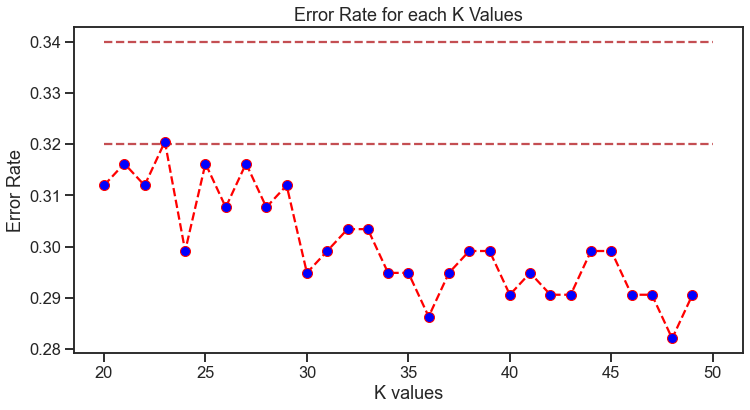

In [198]:
plt.figure(figsize = (12, 6))
plt.plot(range(20,50), error_rates, color = "red", linestyle = "--", marker = "o",
         markerfacecolor= "blue", markersize= 10)
plt.title("Error Rate for each K Values")
plt.xlabel("K values")
plt.ylabel("Error Rate")
plt.hlines(y= 0.34, xmin= 20, xmax= 50,colors = "r", linestyles= "--")
plt.hlines(y= 0.32, xmin= 20, xmax= 50,colors = "r", linestyles= "--")
plt.show()

### Combining Logistic Regression and KNN Algorithms

In [199]:
lr = LogisticRegression(solver='liblinear',penalty='l1',C=2.0417959183673466)
knn = KNeighborsClassifier(n_neighbors=43, weights='distance')

In [200]:
combine_model = VotingClassifier(estimators=[('clf1',lr),('clf2',knn)])

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42,stratify=y)

In [202]:
smote = SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(X_train,y_train)

In [203]:
combine_model.fit(x_res,y_res)

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(C=2.0417959183673466,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('clf2',
                              KNeighborsClassifier(n_neighbors=43,
                                                   weights='distance'))])

In [204]:
y_prediction = combine_model.predict(X_test)

Text(0.5, 58.5, 'Ground Truth')

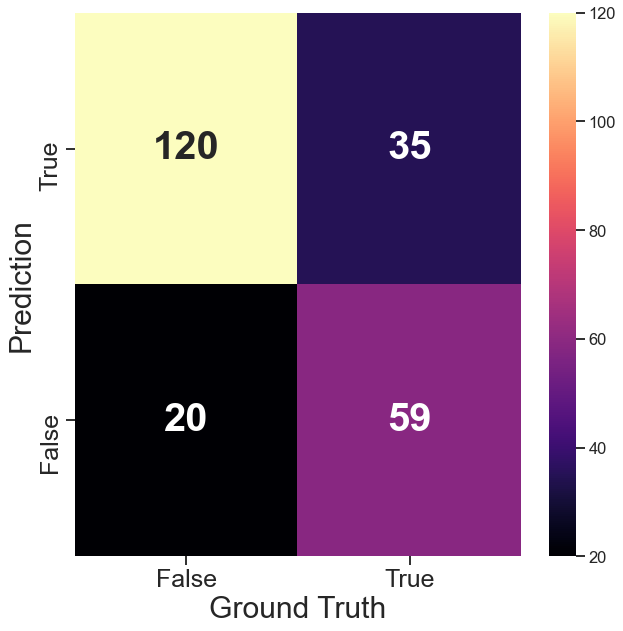

In [205]:
_, cm = plt.subplots(figsize=(10,10))
cm = sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='magma', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
cm.set_xticklabels(labels, fontsize=25);
cm.set_yticklabels(labels[::-1], fontsize=25);
cm.set_ylabel('Prediction', fontsize=30);
cm.set_xlabel('Ground Truth', fontsize=30)

In [206]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81       155
         1.0       0.63      0.75      0.68        79

    accuracy                           0.76       234
   macro avg       0.74      0.76      0.75       234
weighted avg       0.78      0.76      0.77       234



## CONCLUSION

In [207]:
# As a result of those model we can see that the combining model has a better result of weighted average f-1 score (0.77) then KNN (0.72) and Logistic Regression (0.75) alone.
